In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
import time
from datetime import datetime
import requests

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=160.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Starting URL for Weather Map API Call.


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=36a7d0920b25972a5b390f663ed47d43


In [8]:
from citipy import citipy

In [9]:
cities=[]
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)        
                            

614

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | port hardy
Processing Record 2 of Set 13 | busselton
Processing Record 3 of Set 13 | ribeira grande
Processing Record 4 of Set 13 | araouane
Processing Record 5 of Set 13 | longyearbyen
Processing Record 6 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 13 | rikitea
Processing Record 8 of Set 13 | orbetello
Processing Record 9 of Set 13 | khani
Processing Record 10 of Set 13 | punta arenas
Processing Record 11 of Set 13 | torbay
Processing Record 12 of Set 13 | flin flon
Processing Record 13 of Set 13 | caravelas
Processing Record 14 of Set 13 | atuona
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | kodiak
Processing Record 17 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 13 | skagastrond
City not found. Skipping...
Processing Record 19 of Set 13 | hilo
Processing Record 20 of Set 13 | champerico
Processing 

Processing Record 36 of Set 16 | mirnyy
Processing Record 37 of Set 16 | nguiu
City not found. Skipping...
Processing Record 38 of Set 16 | diego de almagro
Processing Record 39 of Set 16 | grand centre
City not found. Skipping...
Processing Record 40 of Set 16 | tura
Processing Record 41 of Set 16 | qandala
Processing Record 42 of Set 16 | constitucion
Processing Record 43 of Set 16 | warqla
City not found. Skipping...
Processing Record 44 of Set 16 | boa vista
Processing Record 45 of Set 16 | thompson
Processing Record 46 of Set 16 | herne bay
Processing Record 47 of Set 16 | marienburg
Processing Record 48 of Set 16 | lorengau
Processing Record 49 of Set 16 | wasilla
Processing Record 50 of Set 16 | bambous virieux
Processing Record 1 of Set 17 | abong mbang
Processing Record 2 of Set 17 | arlit
Processing Record 3 of Set 17 | emerald
Processing Record 4 of Set 17 | samarai
Processing Record 5 of Set 17 | praia da vitoria
Processing Record 6 of Set 17 | provideniya
Processing Record

Processing Record 18 of Set 20 | tocopilla
Processing Record 19 of Set 20 | krasnoselkup
Processing Record 20 of Set 20 | bargal
City not found. Skipping...
Processing Record 21 of Set 20 | kampong cham
Processing Record 22 of Set 20 | alta floresta
Processing Record 23 of Set 20 | boqueirao
Processing Record 24 of Set 20 | zhangye
Processing Record 25 of Set 20 | palkaka
City not found. Skipping...
Processing Record 26 of Set 20 | that phanom
Processing Record 27 of Set 20 | lebowakgomo
Processing Record 28 of Set 20 | tarakan
Processing Record 29 of Set 20 | ola
Processing Record 30 of Set 20 | marawi
Processing Record 31 of Set 20 | marsh harbour
Processing Record 32 of Set 20 | talara
Processing Record 33 of Set 20 | aklavik
Processing Record 34 of Set 20 | tres arroyos
Processing Record 35 of Set 20 | nuuk
Processing Record 36 of Set 20 | solnechnyy
Processing Record 37 of Set 20 | jarinu
Processing Record 38 of Set 20 | talnakh
Processing Record 39 of Set 20 | galle
Processing Re

Processing Record 2 of Set 24 | brigantine
Processing Record 3 of Set 24 | tuatapere
Processing Record 4 of Set 24 | ouallam
Processing Record 5 of Set 24 | phnum penh
City not found. Skipping...
Processing Record 6 of Set 24 | port-gentil
Processing Record 7 of Set 24 | korla
Processing Record 8 of Set 24 | puerto carreno
Processing Record 9 of Set 24 | sambava
Processing Record 10 of Set 24 | macas
Processing Record 11 of Set 24 | springbok
Processing Record 12 of Set 24 | namibe
Processing Record 13 of Set 24 | srednekolymsk
Processing Record 14 of Set 24 | qurayyat
Processing Record 15 of Set 24 | jinka
Processing Record 16 of Set 24 | japura
Processing Record 17 of Set 24 | haikou
Processing Record 18 of Set 24 | celestun
Processing Record 19 of Set 24 | leh
Processing Record 20 of Set 24 | pacific grove
Processing Record 21 of Set 24 | kismayo
Processing Record 22 of Set 24 | virginia beach
Processing Record 23 of Set 24 | arman
Processing Record 24 of Set 24 | derzhavinsk
Proces

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Hardy,50.6996,-127.4199,41.00,93,40,6.91,CA,2021-11-06 13:48:18
1,Busselton,-33.6500,115.3333,50.09,74,0,12.62,AU,2021-11-06 13:48:18
2,Ribeira Grande,38.5167,-28.7000,73.80,83,75,18.41,PT,2021-11-06 13:48:19
3,Araouane,18.9048,-3.5265,95.59,13,51,10.20,ML,2021-11-06 13:48:19
4,Longyearbyen,78.2186,15.6401,22.84,68,75,16.11,SJ,2021-11-06 13:48:20
5,Rikitea,-23.1203,-134.9692,74.79,80,100,15.68,PF,2021-11-06 13:48:21
6,Orbetello,42.4408,11.2196,66.79,60,93,9.46,IT,2021-11-06 13:46:04
7,Khani,41.9563,42.9566,62.17,68,0,2.84,GE,2021-11-06 13:48:22
8,Punta Arenas,-53.1500,-70.9167,51.91,66,75,12.66,CL,2021-11-06 13:48:22
9,Torbay,47.6666,-52.7314,38.39,86,75,19.57,CA,2021-11-06 13:45:51


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hardy,CA,2021-11-06 13:48:18,50.6996,-127.4199,41.00,93,40,6.91
1,Busselton,AU,2021-11-06 13:48:18,-33.6500,115.3333,50.09,74,0,12.62
2,Ribeira Grande,PT,2021-11-06 13:48:19,38.5167,-28.7000,73.80,83,75,18.41
3,Araouane,ML,2021-11-06 13:48:19,18.9048,-3.5265,95.59,13,51,10.20
4,Longyearbyen,SJ,2021-11-06 13:48:20,78.2186,15.6401,22.84,68,75,16.11
...,...,...,...,...,...,...,...,...,...
556,Valparaiso,CL,2021-11-06 14:02:25,-33.0393,-71.6273,59.47,61,0,6.35
557,Biharamulo,TZ,2021-11-06 14:04:05,-2.6319,31.3089,75.70,50,100,3.47
558,Ierapetra,GR,2021-11-06 14:04:06,35.0100,25.7353,75.15,52,41,11.01
559,Kyabram,AU,2021-11-06 14:04:06,-36.3167,145.0500,65.88,85,84,2.89


In [13]:
# Create the output file (CSV).
output_data_file = "World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

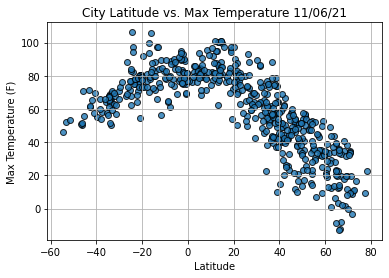

In [16]:
#import time module
import time

#build the scatter plot for latitude and max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

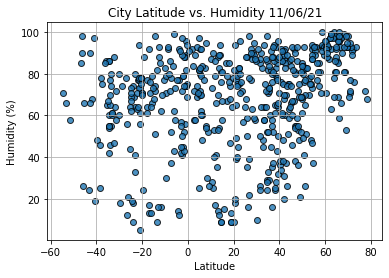

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

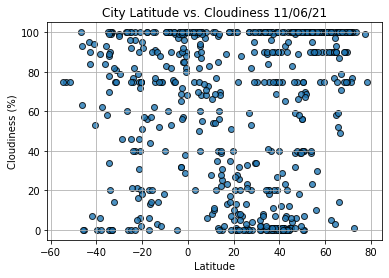

In [18]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig3.png")
# Show plot.
plt.show()

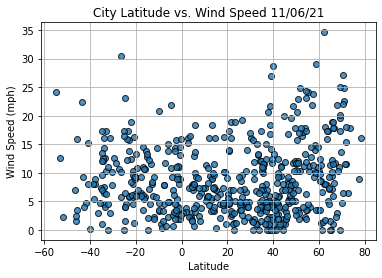

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig4.png")
# Show plot.
plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-11-06 13:47:09
Lat                         -54.8
Lng                         -68.3
Max Temp                    46.06
Humidity                       71
Cloudiness                     75
Wind Speed                  24.16
Name: 13, dtype: object

In [23]:
#filter the dataframe
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
556    False
557    False
558     True
559    False
560    False
Name: Lat, Length: 561, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hardy,CA,2021-11-06 13:48:18,50.6996,-127.4199,41.00,93,40,6.91
2,Ribeira Grande,PT,2021-11-06 13:48:19,38.5167,-28.7000,73.80,83,75,18.41
3,Araouane,ML,2021-11-06 13:48:19,18.9048,-3.5265,95.59,13,51,10.20
4,Longyearbyen,SJ,2021-11-06 13:48:20,78.2186,15.6401,22.84,68,75,16.11
6,Orbetello,IT,2021-11-06 13:46:04,42.4408,11.2196,66.79,60,93,9.46
...,...,...,...,...,...,...,...,...,...
551,Borogontsy,RU,2021-11-06 14:04:02,62.6683,131.1683,0.90,99,100,1.79
553,Black River,JM,2021-11-06 14:04:04,18.0264,-77.8487,81.99,76,100,4.70
554,Kentville,CA,2021-11-06 14:04:05,45.0835,-64.4988,44.40,74,6,11.86
555,Santa Cruz Del Norte,CU,2021-11-06 14:04:05,23.1539,-81.9236,79.54,76,88,18.81


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hardy,CA,2021-11-06 13:48:18,50.6996,-127.4199,41.00,93,40,6.91
2,Ribeira Grande,PT,2021-11-06 13:48:19,38.5167,-28.7000,73.80,83,75,18.41
3,Araouane,ML,2021-11-06 13:48:19,18.9048,-3.5265,95.59,13,51,10.20
4,Longyearbyen,SJ,2021-11-06 13:48:20,78.2186,15.6401,22.84,68,75,16.11
6,Orbetello,IT,2021-11-06 13:46:04,42.4408,11.2196,66.79,60,93,9.46
...,...,...,...,...,...,...,...,...,...
551,Borogontsy,RU,2021-11-06 14:04:02,62.6683,131.1683,0.90,99,100,1.79
553,Black River,JM,2021-11-06 14:04:04,18.0264,-77.8487,81.99,76,100,4.70
554,Kentville,CA,2021-11-06 14:04:05,45.0835,-64.4988,44.40,74,6,11.86
555,Santa Cruz Del Norte,CU,2021-11-06 14:04:05,23.1539,-81.9236,79.54,76,88,18.81


In [27]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Busselton,AU,2021-11-06 13:48:18,-33.6500,115.3333,50.09,74,0,12.62
5,Rikitea,PF,2021-11-06 13:48:21,-23.1203,-134.9692,74.79,80,100,15.68
8,Punta Arenas,CL,2021-11-06 13:48:22,-53.1500,-70.9167,51.91,66,75,12.66
11,Caravelas,BR,2021-11-06 13:48:23,-17.7125,-39.2481,81.00,61,56,9.31
12,Atuona,PF,2021-11-06 13:48:23,-9.8000,-139.0333,78.17,71,83,20.78
...,...,...,...,...,...,...,...,...,...
552,Natal,BR,2021-11-06 14:04:03,-5.7950,-35.2094,88.45,58,75,14.97
556,Valparaiso,CL,2021-11-06 14:02:25,-33.0393,-71.6273,59.47,61,0,6.35
557,Biharamulo,TZ,2021-11-06 14:04:05,-2.6319,31.3089,75.70,50,100,3.47
559,Kyabram,AU,2021-11-06 14:04:06,-36.3167,145.0500,65.88,85,84,2.89


In [30]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

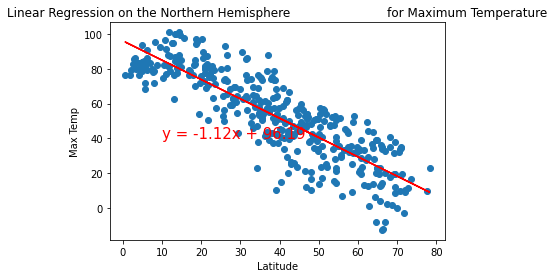

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

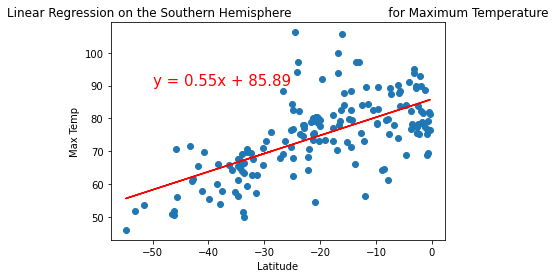

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

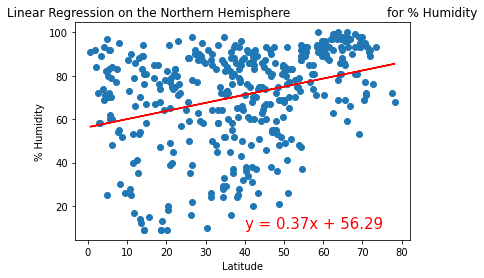

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

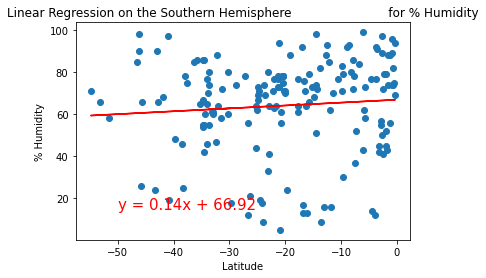

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

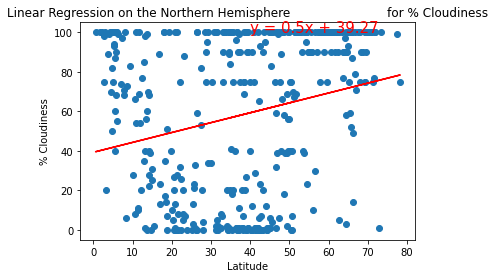

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,100))

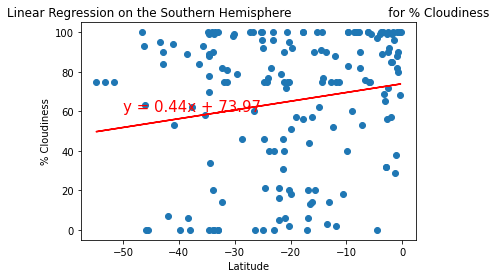

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [43]:
#The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere 
#and less than –0.02 for the Southern Hemisphere for the plots shown here. 
#This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 
#Check the r-values for your plots. 

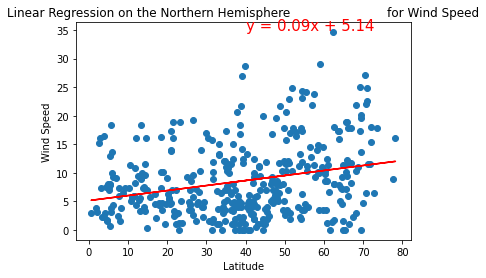

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

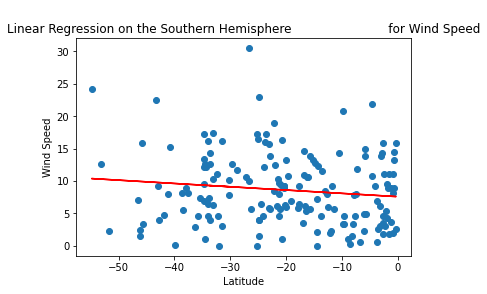

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))